## Доля основных помещений v5 oks_type

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import cx_Oracle #before import, execute from Anaconda prompt: conda install cx_Oracle
cx_Oracle.version.split('.')

['6', '4', '1']

In [3]:
from IPython.core.display import display, HTML, display_html
display(HTML("<style>.container { width:99% !important; }</style>")) # set full window wide cells (only in this notebook)

### 1. Подготовка данных

#### 1.1. Загрузим данные для тренироваки модели

In [13]:
#df = pd.read_csv(u'Выборка с долей2.csv', sep=';', encoding='cp1251')
df = pd.read_excel(u'Выборка с долей2.xlsx')
print(df.shape)

# Удалим строки с пропусками, т.к. значения доли при них не могут быть точными
a = df.shape[0]
df.dropna(0, inplace=True)
b = df.shape[0]
print(a,b,"Deleted", a-b, "null rows")

# Приравняем к 1 доли площади большие чем 1, т.к. доля больше 1 - ошибка и на практике быть не может.
print("part>1 change to 1  count: ", df[df[u'Доля площади основных помещений']>1].shape[0])
df[u'Доля площади основных помещений'][df[u'Доля площади основных помещений']>1] = 1
print("part=1 count:", df[df[u'Доля площади основных помещений']==1].shape[0])
df.head(3)

(18652, 7)
18652 18617 Deleted 35 null rows
part>1 change to 1  count:  29
part=1 count: 1704


C:\Users\EgorovAV\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,Наименование,Доля площади основных помещений
0,77:07:0012006:1080,1996.0,5470.8,3.0,1,Производство,0.655297
1,77:07:0012006:1290,1996.0,999.2,1.0,0,Производство,1.000000
2,77:02:0023010:1017,1969.0,77.3,1.0,0,Производство,0.695990


In [14]:
# Оценим кол-во категориальных признаков
df[u'Наименование'].value_counts()

Офисы                                                   5555
Коммерческие объекты                                    5239
Производство                                            3770
Социальные объекты                                      2300
Объекты неустановленного назначения                      811
Гаражи                                                   621
Гостиницы                                                197
Объекты вспомогательного назначения                      111
Объекты портов, вокзалов, станций                          9
Санатории                                                  3
Объекты садового, огородного и дачного строительства       1
Name: Наименование, dtype: int64

#### 1.2. Посмотрим распределение доли площади основных помещений в зданиях различного назначения

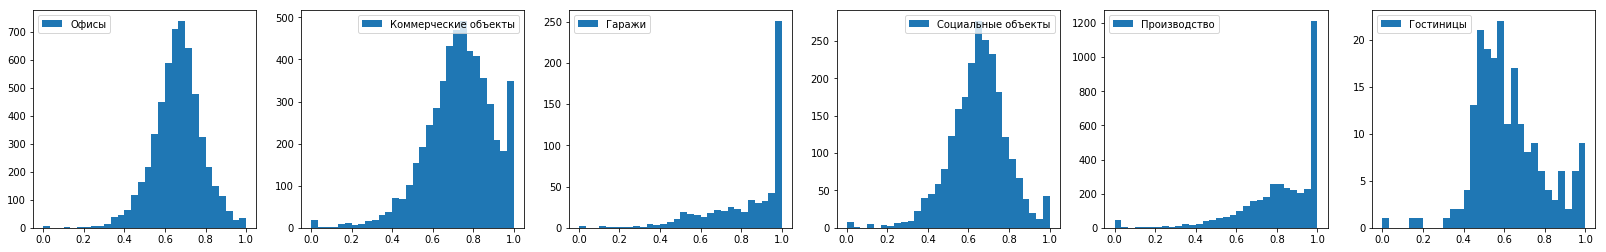

In [15]:
# Посмотрим распределение доли площади основных помещений в зданиях различного назначения 
fig, ax = plt.subplots(nrows=1, ncols=6 , figsize=(28,4)); i=0; bins=30
ax[i].hist(df[df[u'Наименование']==u'Офисы'][u'Доля площади основных помещений'], bins=bins, label=u'Офисы'); ax[i].legend(); i+=1
ax[i].hist(df[df[u'Наименование']==u'Коммерческие объекты'][u'Доля площади основных помещений'], bins=bins, label=u'Коммерческие объекты'); ax[i].legend(); i+=1
ax[i].hist(df[df[u'Наименование']==u'Гаражи'][u'Доля площади основных помещений'], bins=bins, label=u'Гаражи'); ax[i].legend(); i+=1
ax[i].hist(df[df[u'Наименование']==u'Социальные объекты'][u'Доля площади основных помещений'], bins=bins, label=u'Социальные объекты'); ax[i].legend(); i+=1
ax[i].hist(df[df[u'Наименование']==u'Производство'][u'Доля площади основных помещений'], bins=bins, label=u'Производство'); ax[i].legend(); i+=1
ax[i].hist(df[df[u'Наименование']==u'Гостиницы'][u'Доля площади основных помещений'], bins=bins, label=u'Гостиницы'); ax[i].legend();
# Офисы, комм. и гаражи имеют норм распределение доли площади основных помещений с центром от 0.6 до 0.7 
# Кол-во соц., произв. объектов и гостиниц недостаточно для визуальной оценики распределения

#### 1.3 Посчитаем математическое ожидание, дисперсию и среднеквадратичное отклонение в распределениях основных типов ОКС

In [16]:
x = df[df[u'Наименование']==u'Офисы'][u'Доля площади основных помещений'] 
print('''Офисы:    %f - математическое ожидание      %f - дисперсия      %f - среднеквадратичное отклонение (СКО)''' % (np.mean(x), np.var(x), np.std(x)))
x = df[df[u'Наименование']==u'Коммерческие объекты'][u'Доля площади основных помещений'] 
print('''Комм.:    %f - математическое ожидание      %f - дисперсия      %f - среднеквадратичное отклонение (СКО)''' % (np.mean(x), np.var(x), np.std(x)))
x = df[df[u'Наименование']==u'Гаражи'][u'Доля площади основных помещений'] 
print('''Гаражи:   %f - математическое ожидание      %f - дисперсия      %f - среднеквадратичное отклонение (СКО)''' % (np.mean(x), np.var(x), np.std(x)))

Офисы:    0.662617 - математическое ожидание      0.014151 - дисперсия      0.118957 - среднеквадратичное отклонение (СКО)
Комм.:    0.729340 - математическое ожидание      0.026323 - дисперсия      0.162244 - среднеквадратичное отклонение (СКО)
Гаражи:   0.836219 - математическое ожидание      0.038131 - дисперсия      0.195271 - среднеквадратичное отклонение (СКО)


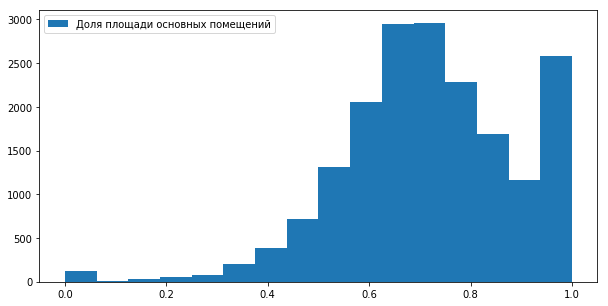

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df[u'Доля площади основных помещений'], bins=16, label=u'Доля площади основных помещений')
ax.legend();
# Судя по математическому ожиданию и гистограмме - доля площади основных помещений имеет сдвинутое вправо нормальное распределение в точке 0.65

#### 1.4 Преобразуем категориальный признак "Назначение"

In [18]:
# Преобразуем их в одноименные бинарные признаки
for purpose in (df[u'Наименование'].value_counts()).index:
    df[purpose] = df[u'Наименование'].apply(lambda p: 1 if p == purpose else 0 )
df.head()

,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,Наименование,Доля площади основных помещений,Офисы,Коммерческие объекты,Производство,Социальные объекты,Объекты неустановленного назначения,Гаражи,Гостиницы,Объекты вспомогательного назначения,"Объекты портов, вокзалов, станций",Санатории,"Объекты садового, огородного и дачного строительства"
0,77:07:0012006:1080,1996.0,5470.8,3.0,1,Производство,0.655297,0,0,1,0,0,0,0,0,0,0,0
1,77:07:0012006:1290,1996.0,999.2,1.0,0,Производство,1.000000,0,0,1,0,0,0,0,0,0,0,0
2,77:02:0023010:1017,1969.0,77.3,1.0,0,Производство,0.695990,0,0,1,0,0,0,0,0,0,0,0
3,77:02:0019002:1014,1967.0,1218.3,1.0,0,Офисы,0.978905,1,0,0,0,0,0,0,0,0,0,0
4,77:01:0006027:1052,1995.0,22946.8,4.0,2,Офисы,0.613872,1,0,0,0,0,0,0,0,0,0,0


In [19]:
df.shape

(18617, 18)

### 2.  Подготовка модели

#### 2.1. Загрузим необходимые библиотеки

In [20]:
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn import linear_model, metrics, ensemble, model_selection
#from sklearn.feature_extraction import DictVectorizer
from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC, LinearSVR
from sklearn.pipeline import Pipeline
import xgboost
#from itertools import product

C:\Users\EgorovAV\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\EgorovAV\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


#### 2.2. Преобразуем признаки, которые должны иметь целые значения

In [21]:
# Преобразуем признаки, которые должны иметь целые значения
df[[u'Год постройки', u'Количество надземных этажей']] = df[[u'Год постройки', u'Количество надземных этажей']].astype(int) # Преобразуем в целые знаяения
print(df.shape)
df.head(2)

(18617, 18)


,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,Наименование,Доля площади основных помещений,Офисы,Коммерческие объекты,Производство,Социальные объекты,Объекты неустановленного назначения,Гаражи,Гостиницы,Объекты вспомогательного назначения,"Объекты портов, вокзалов, станций",Санатории,"Объекты садового, огородного и дачного строительства"
0,77:07:0012006:1080,1996,5470.8,3,1,Производство,0.655297,0,0,1,0,0,0,0,0,0,0,0
1,77:07:0012006:1290,1996,999.2,1,0,Производство,1.000000,0,0,1,0,0,0,0,0,0,0,0


#### 2.3. Добавим дополнительные признаки (фичи)

In [22]:
# Добавим 3 признака площади на этаж
y = df[u'Доля площади основных помещений'] # Отделим целевой признак
X = df.drop([u'Кадастровый номер',u'Наименование',u'Доля площади основных помещений'], axis=1) # Уберем не требующиеся для обучения признаки (категориальные и целевой)
X['LEV_SQ'] = df[u'Площадь'] / (df[u'Количество надземных этажей'] + df[u'Количество подземных этажей']) 
X['UP_SQ'] = df[u'Площадь'] - (df[u'Площадь'] / (df[u'Количество надземных этажей'] + df[u'Количество подземных этажей']))*df[u'Количество подземных этажей']
X['DW_SQ'] = df[u'Площадь'] - (df[u'Площадь'] / (df[u'Количество надземных этажей'] + df[u'Количество подземных этажей']))*df[u'Количество надземных этажей']
#X.replace(np.nan, 0, inplace=True) # Обнулим результаты деления на ноль 
X.head()

,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,Офисы,Коммерческие объекты,Производство,Социальные объекты,Объекты неустановленного назначения,Гаражи,Гостиницы,Объекты вспомогательного назначения,"Объекты портов, вокзалов, станций",Санатории,"Объекты садового, огородного и дачного строительства",LEV_SQ,UP_SQ,DW_SQ
0,1996,5470.8,3,1,0,0,1,0,0,0,0,0,0,0,0,1367.700000,4103.100000,1367.700000
1,1996,999.2,1,0,0,0,1,0,0,0,0,0,0,0,0,999.200000,999.200000,0.000000
2,1969,77.3,1,0,0,0,1,0,0,0,0,0,0,0,0,77.300000,77.300000,0.000000
3,1967,1218.3,1,0,1,0,0,0,0,0,0,0,0,0,0,1218.300000,1218.300000,0.000000
4,1995,22946.8,4,2,1,0,0,0,0,0,0,0,0,0,0,3824.466667,15297.866667,7648.933333


%%time
#Тюннинг модели xgboost с GridSearch перебором параметров (текущая версия на 15 мин)
param_grid = {'n_estimators': [100, 200, 400],
              'max_depth': [3,6,10,30],
              'learning_rate': [0.01, 0.1, 1]}
estimator = xgboost.XGBRegressor(random_state=0)
optimizer = GridSearchCV(estimator, param_grid, n_jobs=4, cv=10, scoring='neg_mean_absolute_error')
optimizer.fit(X, y)
print optimizer.scorer_, optimizer.scoring, optimizer.best_score_, optimizer.best_params_

In [25]:
trim = 18000 # Отделим для обучения строк
X_train = X[:trim]
y_train = y[:trim]
X_test = X[trim:]
y_test = y[trim:]
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((18000, 18), (18000,), (617, 18), (617,))

#### 2.4. Обучим модель

In [26]:
# Обучение модели
estimator = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=0)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred.shape

(617,)

Средняя абсолютная ошибка (MAE - medium absolute err) 0.003473992597974061
Среднесмещенная ошибка (MBE - medium bias err) -0.003473992597974061
Среднеквадратичная ошибка (RMSE - root medium squared err) 0.13783585198943293


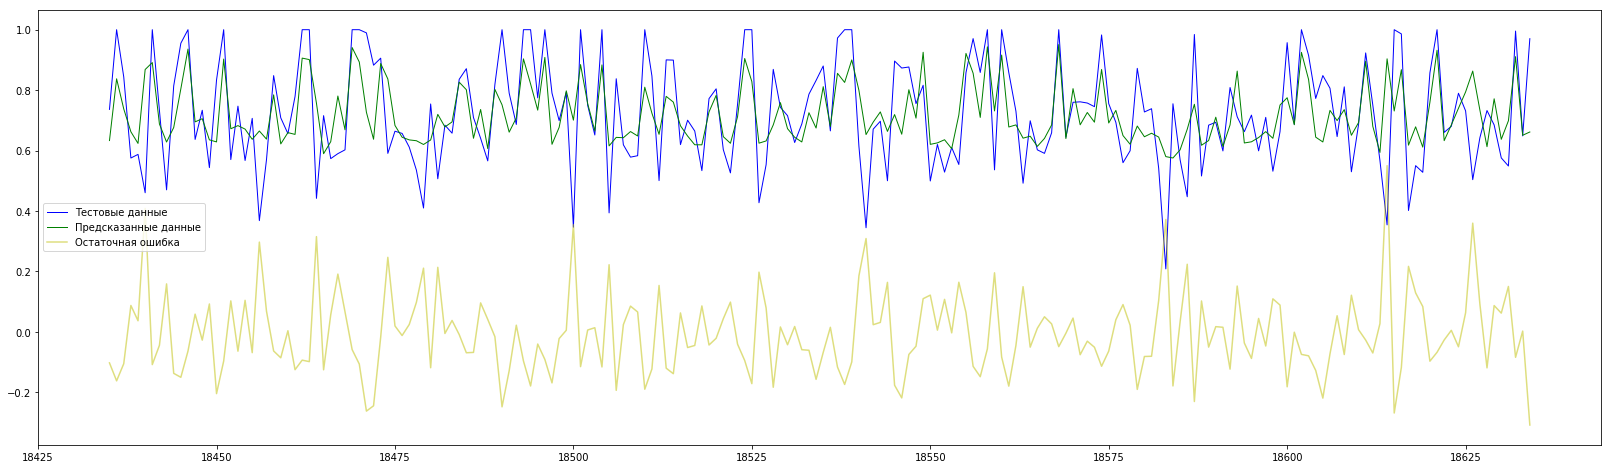

In [27]:
print('Средняя абсолютная ошибка (MAE - medium absolute err)', abs( np.mean( y_pred - y_test ) ))
print('Среднесмещенная ошибка (MBE - medium bias err)', np.mean( y_pred - y_test ))
print('Среднеквадратичная ошибка (RMSE - root medium squared err)', np.sqrt( np.mean( (y_pred - y_test) ** 2) ))
trim_from = 400; trim_cut = 200
fig, ax = plt.subplots(figsize=(28,8))
ax.plot(y_test[trim_from:trim_from+trim_cut].index, y_test[trim_from:trim_from+trim_cut], color='b', alpha=1, linewidth=1, label=u'Тестовые данные')
ax.plot(y_test[trim_from:trim_from+trim_cut].index, y_pred[trim_from:trim_from+trim_cut], color='g', alpha=1, linewidth=1, label=u'Предсказанные данные')
ax.plot(y_test[trim_from:trim_from+trim_cut].index, y_pred[trim_from:trim_from+trim_cut]-y_test[trim_from:trim_from+trim_cut], color='y', alpha=.5, label=u'Остаточная ошибка')
ax.legend(loc='center left');

### 3. Прогнозирование доли площади основных помещений для заданных кадастровых номеров из xls файла

In [86]:
%%time
# TODO FETCHALL
# Подключаемся к базе Oracle и выкачиваем данные соответствующие кадастровым номерам в df['Кадастровый номер']
connection = cx_Oracle.connect('READ_USER/READ_USER@172.16.108.27:1521/jobdbp_1')
cursor = connection.cursor()

sequence = '"'+','.join(list(df[:10]['Кадастровый номер']))+'"'
#print(sequence)

levels = cursor.execute('''select DISTINCT b.cadnum,l.FLOORS_FLOOR,l.FLOORS_UNDFLOOR 
    from DK_V_BUILDING_20180801 b 
    left join ASUR_RR2_20180801.T$RR#REALTY l 
    on b.CADNUM=l.REALTY_ID''').fetchall()

cursor.close()
connection.close()

df_sql = pd.DataFrame(levels, columns=['CADNUM','UP_FL','UND_FL',])
df_sql.head(2)

Wall time: 49.5 s


#### 3.1. Получение данных из БД Оракл

In [31]:
#Загрузим файл с кад. номерами объектов для прогноза доли
df = pd.read_excel('23 ОКС для прогноза доли.xlsx')

In [41]:
%%time
connection = cx_Oracle.connect('READ_USER/READ_USER@172.16.108.27:1521/jobdbp_1')

# Выберем из БД необходимые данные        #EXTRACT(YEAR FROM b.REG_NUMR_DTCR)
for i in np.arange(0, len(df), 900):
    df_sql = pd.read_sql(sql='''select DISTINCT b.cadnum as "Кадастровый номер", b.EXPCHAR_YEARBUILD as "Год постройки", b.AREA as "Площадь", 
    r.FLOORS_FLOOR as "Количество надземных этажей", r.FLOORS_UNDFLOOR as "Количество подземных этажей", 
    b.ACTUAL, b.REALTYTYPE, t1.GROUP16 as OKS_TYPE16, t2.GKO_NEW as OKS_TYPE18 
    from DK_V_BUILDING_20180801 b 
    join ASUR_RR2_20180801.T$RR#REALTY r on b.CADNUM = r.REALTY_ID and b.CADNUM in ('''+str(list(df['Кадастровый номер'][i:i+800].values))[1:-1]+''') 
    left join AM_GKO2 t1 on b.CADNUM = t1.CADASTRALNUMBER 
    left join T_OCENKA_OKS_2018_A t2 on b.CADNUM = t2.CADNUM''', con=connection)
    if i != 0: 
        df_sum = pd.concat([df_sum, df_sql])
        print('Loaded:',i,'-',i+800)
    else:
        df_sum = df_sql.copy()

Wall time: 169 ms


                    В обучающей сборке:
Офисы                                                   5555
Коммерческие объекты                                    5239
Производство                                            3770
Социальные объекты                                      2300
Объекты неустановленного назначения                      811
Гаражи                                                   621
Гостиницы                                                197
Объекты вспомогательного назначения                      111
Объекты портов, вокзалов, станций                          9
Санатории                                                  3
Объекты садового, огородного и дачного строительства       1

#### 3.2. Заполнение колонки Наименование по словарю

In [42]:
dict_oks_type16 = { '1': 'Объекты многоквартирной жилой застройки',
'2': 'Объекты индивидуальной жилой застройки',
'3': 'Гаражи',
'5': 'Коммерческие объекты',
'6': 'Гостиницы',
'7': 'Офисы',
'9': 'Производство',
'8': 'Санатории',
'10': 'Социальные объекты',
'11': 'Объекты портов, вокзалов, станций',
'4': 'Объекты, садового, огородного и дачного строительства',
'12': 'Объекты иного назначения',
'13': 'Сооружения'}
dict_oks_type16_full = { '1': 'Объекты многоквартирной жилой застройки',
'2': 'Объекты индивидуальной жилой застройки',
'3': 'Объекты, предназначенные для хранения индивидуального транспорта',
'5': 'Объекты торговли, общественного питания, бытового обслуживания, сервиса, отдыха и развлечений, включая объекты многофункционального назначения',
'6': 'Объекты, предназначенные для временного проживания',
'7': 'Объекты офисно-делового назначения',
'9': 'Объекты производственного назначения',
'8': 'Объекты санаторно-курортного назначения',
'10': 'Объекты социальной инфраструктуры',
'11': 'Объекты портов, вокзалов, станций',
'4': 'Объекты, садового, огородного и дачного строительства',
'12': 'Объекты иного назначения',
'13': 'Сооружения'}

def oks_type16(oks_type):
    for key, oks in zip( dict_oks_type16.keys(), dict_oks_type16.values() ):
        if key == oks_type:
            return oks
    return 'Объекты неустановленного назначения'
#for key, oks in zip(dict_oks_type16.keys(), dict_oks_type16.values()): print (key, oks) #TEST

df_sum['Наименование'] = df_sum['OKS_TYPE16'].apply(lambda f: oks_type16(f))

In [61]:
df = df_sum.copy()
df

,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,ACTUAL,REALTYTYPE,OKS_TYPE16,OKS_TYPE18,Наименование
0,77:05:0011010:1077,1991,8420.4,4,None,0,Здание,5,4,Коммерческие объекты
1,77:09:0001004:1628,2005,5332.1,None,None,1,Сооружение,13,None,Сооружения
2,77:01:0004042:6285,None,21716.1,1,4,1,Сооружение,13,None,Сооружения
3,77:02:0021006:2157,2014,40813.4,22,1,1,Здание,7,6,Офисы
4,77:05:0001002:1155,1864,10654.2,3,1,0,Здание,12,None,Объекты иного назначения
5,77:09:0005016:1203,1958,2315.3,2,0,0,Здание,9,None,Производство
6,77:08:0000000:3005,None,8386.1,11,None,0,Здание,None,None,Объекты неустановленного назначения
7,77:02:0002008:1001,None,10721.5,None,None,1,Объект незавершенного строительства,5,None,Коммерческие объекты
8,77:01:0002014:5096,2014,3832.3,5,1,1,Здание,7,6,Офисы
9,77:03:0004004:1045,1982,7696.4,6,1,0,Здание,7,None,Офисы


In [62]:
df['Количество надземных этажей'].copy(deep=False).loc[11] = 27
df

,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,ACTUAL,REALTYTYPE,OKS_TYPE16,OKS_TYPE18,Наименование
0,77:05:0011010:1077,1991,8420.4,4,None,0,Здание,5,4,Коммерческие объекты
1,77:09:0001004:1628,2005,5332.1,None,None,1,Сооружение,13,None,Сооружения
2,77:01:0004042:6285,None,21716.1,1,4,1,Сооружение,13,None,Сооружения
3,77:02:0021006:2157,2014,40813.4,22,1,1,Здание,7,6,Офисы
4,77:05:0001002:1155,1864,10654.2,3,1,0,Здание,12,None,Объекты иного назначения
5,77:09:0005016:1203,1958,2315.3,2,0,0,Здание,9,None,Производство
6,77:08:0000000:3005,None,8386.1,11,None,0,Здание,None,None,Объекты неустановленного назначения
7,77:02:0002008:1001,None,10721.5,None,None,1,Объект незавершенного строительства,5,None,Коммерческие объекты
8,77:01:0002014:5096,2014,3832.3,5,1,1,Здание,7,6,Офисы
9,77:03:0004004:1045,1982,7696.4,6,1,0,Здание,7,None,Офисы


In [173]:
# Если файл получен со всеми данными включая назначение/наименование
#df = pd.read_excel('23869 объектов с назначением зданий.xlsx')
print(df.shape)
df.head(2)

(23868, 6)


,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,Наименование
0,77:07:0012006:1080,1996.0,5470.8,3.0,1.0,Производство
1,77:07:0012006:1290,1996.0,999.2,1.0,0.0,Производство


In [190]:
df2 = df2.merge(df.set_index('Кадастровый номер')[['Год постройки','Количество надземных этажей','Количество подземных этажей','Наименование']], left_on='Кадастровый номер', right_on='Кадастровый номер', how='inner')
df2.head(2)

,Кадастровый номер,Площадь,Доля площади основных помещений,Год постройки,Количество надземных этажей,Количество подземных этажей,Наименование
0,77:04:0004007:1190,1400.8,0.649498,1958.0,4.0,1.0,Офисы
1,77:04:0001015:1034,7044.7,0.649421,1972.0,6.0,1.0,Социальные объекты


In [51]:
df.isna().max()

Кадастровый номер              False
Год постройки                  False
Площадь                        False
Количество надземных этажей    False
Количество подземных этажей    False
ACTUAL                         False
REALTYTYPE                     False
OKS_TYPE16                     False
OKS_TYPE18                     False
Наименование                   False
dtype: bool

In [49]:
df[df[u'Год постройки'].isna()]

,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,ACTUAL,REALTYTYPE,OKS_TYPE16,OKS_TYPE18,Наименование


In [50]:
df[df[u'Количество подземных этажей'].isna()]

,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,ACTUAL,REALTYTYPE,OKS_TYPE16,OKS_TYPE18,Наименование


In [52]:
df[u'Количество подземных этажей'].copy(deep=False)[df[u'Количество подземных этажей'].isna()] = 0 # WITH COPY(deep=False)

In [54]:
df[df[u'Количество надземных этажей'].isna()]

,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,ACTUAL,REALTYTYPE,OKS_TYPE16,OKS_TYPE18,Наименование


In [57]:
df[u'Количество надземных этажей'].copy(deep=False)[df[u'Количество надземных этажей'].isna()] = 0 # WITH COPY(deep=False)

In [ ]:
df[df[u'Количество надземных этажей'].str.contains(r'[А-Яа-я]', regex=True)]

In [ ]:
df2['UP_FL'].copy(deep=False).loc[3815] = '2'
df2[df2['UP_FL'].str.contains(r'[А-Яа-я]', regex=True)] = '3'

In [ ]:
df2[df2['UND_FL'].str.contains(r'[А-Яа-я]', regex=True)]

In [ ]:
df2[df2['UND_FL'].str.contains(r'[А-Яа-я]', regex=True)] = 1

In [245]:
#Обработаем выше полученный из Oracle - датафрейм df2
df = df2[['Кадастровый номер','Год постройки','Площадь','Количество надземных этажей','Количество подземных этажей','Наименование']]
df.tail()

,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,Наименование
6483,77:04:0003010:1207,1957.0,3777.3,6.0,1.0,Офисы
6484,77:04:0003018:1061,1982.0,1288.8,1.0,1.0,Коммерческие объекты
6485,77:01:0001079:1042,1917.0,478.1,2.0,1.0,Офисы
6486,77:04:0004009:1070,1997.0,5401.6,4.0,1.0,Офисы
6487,77:06:0012005:1016,2005.0,8979.7,4.0,0.0,Гаражи


In [247]:
df.fillna(0, inplace=True)

C:\Users\EgorovAV\anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


#### 3.3. Обработаем основной блок данных и построим прогноз

#Загрузим csv файл с данными для прогнозирования
#df = pd.read_excel(u'172 объекта для прогноза.xlsx') # Russian encodings: cp1251, cp866, koi8_r
df = pd.read_excel(u'От 0 до 5% объекты для прогноза.xlsx') # Russian encodings: cp1251, cp866, koi8_r
df.fillna(0, inplace=True)
print(df.shape)
df.head()

AttributeError: 'NoneType' object has no attribute 'update'

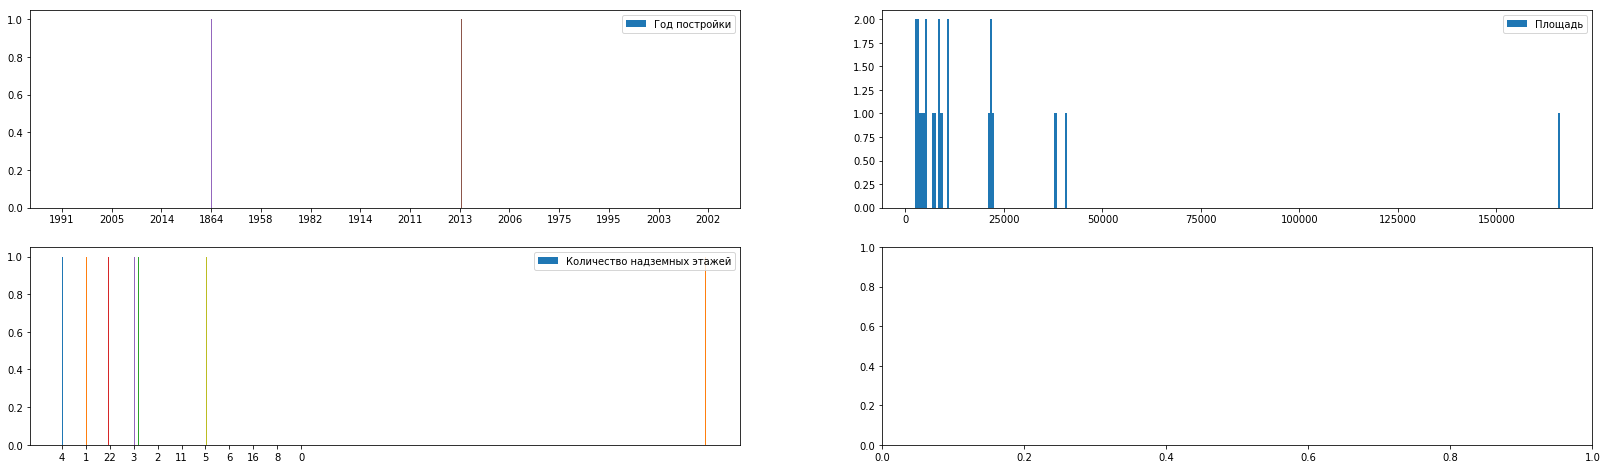

In [63]:
# Посмотрим на выбросы
df.fillna(0, inplace=True)
fig, ax = plt.subplots(nrows=2, ncols=2 , figsize=(28,8))
ax[0,0].hist(df[u'Год постройки'], bins=200, label=u'Год постройки'); ax[0,0].legend()
ax[0,1].hist(df[u'Площадь'], bins=300, label=u'Площадь'); ax[0,1].legend()
ax[1,0].hist(df[u'Количество надземных этажей'], bins=100, label=u'Количество надземных этажей'); ax[1,0].legend()
ax[1,1].hist(df[u'Количество подземных этажей'], bins=100, label=u'Количество подземных этажей'); ax[1,1].legend();

In [ ]:
print('Заменено "0" в колонке - год постройки:', len(df[u'Год постройки'][ df[u'Год постройки']==0 ]))

a = []
for i in range(len(df)):
    a.append(np.random.randint(1950,2017))
#np.set_printoptions(threshold=np.inf, linewidth=80)
#print a

#Заменим 0 год постройки на случайное значение от 1950 до 2017

df[u'Год постройки'][ df[u'Год постройки']==0 ] = a #df[u'Год постройки'].median()

#Заменим все назначения отсутствующие в размеченных данных на Коммерческие объекты
df[u'Наименование'] = df[u'Наименование'].aplly( lambda f: u'Коммерческие объекты'\
                if ((f==u'Объекты неустановленного назначения') | (f==u'Объекты вспомогательного назначения') |\
                    (f==u'Объекты портов, вокзалов, станций') | (f==u'Санатории') | (f==u'Объекты садового, огородного и дачного строительства')) else f)

df.drop(df[ (df[u'Наименование']==u'Объекты неустановленного назначения') | (df[u'Наименование']==u'Объекты вспомогательного назначения')
           | (df[u'Наименование']==u'Объекты портов, вокзалов, станций') | (df[u'Наименование']==u'Санатории') | 
           (df[u'Наименование']==u'Объекты садового, огородного и дачного строительства')].index, inplace=True)

In [ ]:
                    В обучающей сборке:
Офисы                                                   5555
Коммерческие объекты                                    5239
Производство                                            3770
Социальные объекты                                      2300
Объекты неустановленного назначения                      811
Гаражи                                                   621
Гостиницы                                                197
Объекты вспомогательного назначения                      111
Объекты портов, вокзалов, станций                          9
Санатории                                                  3
Объекты садового, огородного и дачного строительства       1

In [64]:
# В сборке для прогнозирования надо сделать последовательность и кол-во наименований в точности как в обучающей!
df[u'Наименование'].value_counts()

Офисы                                  7
Сооружения                             6
Коммерческие объекты                   3
Объекты неустановленного назначения    2
Производство                           1
Гаражи                                 1
Гостиницы                              1
Объекты иного назначения               1
Социальные объекты                     1
Name: Наименование, dtype: int64

In [65]:
X = df.copy()
model_columns = [u'Офисы', u'Коммерческие объекты', u'Производство', u'Социальные объекты', u'Объекты неустановленного назначения', 
         u'Гаражи', u'Гостиницы', u'Объекты вспомогательного назначения', u'Объекты портов, вокзалов, станций', 
         u'Санатории', u'Объекты садового, огородного и дачного строительства']
for purpose in model_columns:
    X[purpose] = 0
X.head(2)

,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,ACTUAL,REALTYTYPE,OKS_TYPE16,OKS_TYPE18,Наименование,...,Коммерческие объекты,Производство,Социальные объекты,Объекты неустановленного назначения,Гаражи,Гостиницы,Объекты вспомогательного назначения,"Объекты портов, вокзалов, станций",Санатории,"Объекты садового, огородного и дачного строительства"
0,77:05:0011010:1077,1991,8420.4,4,0,0,Здание,5,4,Коммерческие объекты,...,0,0,0,0,0,0,0,0,0,0
1,77:09:0001004:1628,2005,5332.1,0,0,1,Сооружение,13,0,Сооружения,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Удаляем наименование не присутствующее в обученной модели
X.drop(['ACTUAL','REALTYTYPE','OKS_TYPE16','OKS_TYPE18'], axis=1, inplace=True) 

In [67]:
# Преобразуем наименования выборки для прогноза в одноименные бинарные признаки в уже созданные колонки с наименованиями как в обученной модели
for purpose in model_columns:
    X[purpose] = df[u'Наименование'].apply(lambda p: 1 if p == purpose else 0 )
X.head(2)

,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,Наименование,Офисы,Коммерческие объекты,Производство,Социальные объекты,Объекты неустановленного назначения,Гаражи,Гостиницы,Объекты вспомогательного назначения,"Объекты портов, вокзалов, станций",Санатории,"Объекты садового, огородного и дачного строительства"
0,77:05:0011010:1077,1991,8420.4,4,0,Коммерческие объекты,0,1,0,0,0,0,0,0,0,0,0
1,77:09:0001004:1628,2005,5332.1,0,0,Сооружения,0,0,0,0,0,0,0,0,0,0,0


#Добавляем отсутствующие колонки
X[u'Объекты портов, вокзалов, станций'] = 0
X[u'Санатории'] = 0
#Удаляем колонки не вошедшие в обученную модель
X.drop([u'Кадастровый номер',u'Наименование'], axis=1, inplace=True)
#Удаляем наименование не присутствующее в обученной модели
X.drop([u'Объекты улично-дорожной сети'], axis=1, inplace=True) 
#Выставляем последовательность колонок как в данных для обучения
X = X[[u'Год постройки', u'Площадь', u'Количество надземных этажей', u'Количество подземных этажей', \
         u'Офисы', u'Коммерческие объекты', u'Производство', u'Социальные объекты', u'Объекты неустановленного назначения', \
         u'Гаражи', u'Гостиницы', u'Объекты вспомогательного назначения', u'Объекты портов, вокзалов, станций', \
         u'Санатории', u'Объекты садового, огородного и дачного строительства']]

In [69]:
# Преобразуем признаки, которые должны иметь целые значения
X[[u'Год постройки', u'Количество надземных этажей', u'Количество подземных этажей']] = X[[u'Год постройки', u'Количество надземных этажей', u'Количество подземных этажей']].astype(float)
X.drop([u'Кадастровый номер',u'Наименование'], axis=1, inplace=True)
X.head()

,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,Офисы,Коммерческие объекты,Производство,Социальные объекты,Объекты неустановленного назначения,Гаражи,Гостиницы,Объекты вспомогательного назначения,"Объекты портов, вокзалов, станций",Санатории,"Объекты садового, огородного и дачного строительства"
0,1991.0,8420.4,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0
1,2005.0,5332.1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,21716.1,1.0,4.0,0,0,0,0,0,0,0,0,0,0,0
3,2014.0,40813.4,22.0,1.0,1,0,0,0,0,0,0,0,0,0,0
4,1864.0,10654.2,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
# Добавим 3 признака площади на этаж
X['LEV_SQ'] = X[u'Площадь'] / (X[u'Количество надземных этажей'] + X[u'Количество подземных этажей']) 
X['UP_SQ'] = X[u'Площадь'] - (X[u'Площадь'] / (X[u'Количество надземных этажей'] + X[u'Количество подземных этажей'])) * X[u'Количество подземных этажей']
X['DW_SQ'] = X[u'Площадь'] - (X[u'Площадь'] / (X[u'Количество надземных этажей'] + X[u'Количество подземных этажей'])) * X[u'Количество надземных этажей']
X.replace(np.nan, 0, inplace=True) # Обнулим результаты деления на ноль 
X.replace(np.inf, 0, inplace=True) # Обнулим результаты деления на ноль 
X.head()

,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,Офисы,Коммерческие объекты,Производство,Социальные объекты,Объекты неустановленного назначения,Гаражи,Гостиницы,Объекты вспомогательного назначения,"Объекты портов, вокзалов, станций",Санатории,"Объекты садового, огородного и дачного строительства",LEV_SQ,UP_SQ,DW_SQ
0,1991.0,8420.4,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,2105.100000,8420.400000,0.000000
1,2005.0,5332.1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
2,0.0,21716.1,1.0,4.0,0,0,0,0,0,0,0,0,0,0,0,4343.220000,4343.220000,17372.880000
3,2014.0,40813.4,22.0,1.0,1,0,0,0,0,0,0,0,0,0,0,1774.495652,39038.904348,1774.495652
4,1864.0,10654.2,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,2663.550000,7990.650000,2663.550000


In [159]:
#Заменим значения inf
#X.replace(np.inf, 0, inplace=True)
#X.fillna(0, inplace=True)

# Нормализация
#scaler = Normalizer().fit(X.iloc[:,:2])
#X.iloc[:,:2] = scaler.transform(X.iloc[:,:2])
#scaler = Normalizer().fit(X.iloc[:,-3:])
#X.iloc[:,-3:] = scaler.transform(X.iloc[:,-3:])

#X = X.astype(int)

In [71]:
y_pred = estimator.predict(X) #xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=0).predict(X)

Гаражи:   0.694479 - математическое ожидание      0.005331 - дисперсия      0.073014 - среднеквадратичное отклонение (СКО)


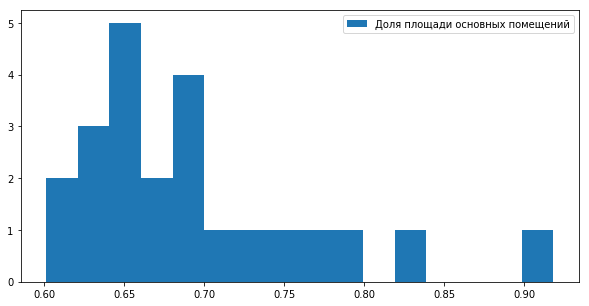

In [72]:
# Судя по математическое ожиданию и гистограмме - доля площади основных помещений имеет нормальное распределение в точке 0.65
fig, ax = plt.subplots(figsize=(10,5))
print('''Гаражи:   %f - математическое ожидание      %f - дисперсия      %f - среднеквадратичное отклонение (СКО)''' % (np.mean(y_pred), np.var(y_pred), np.std(y_pred)))
ax.hist(y_pred, bins=16, label=u'Доля площади основных помещений')
ax.legend();

In [73]:
df_save = df[[u'Кадастровый номер', u'Год постройки', u'Площадь', u'Количество надземных этажей', u'Количество подземных этажей', u'Наименование']]
df_save[u'Доля площади основных помещений'] = y_pred
df_save

C:\Users\EgorovAV\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,Наименование,Доля площади основных помещений
0,77:05:0011010:1077,1991,8420.4,4,0,Коммерческие объекты,0.741220
1,77:09:0001004:1628,2005,5332.1,0,0,Сооружения,0.918278
2,77:01:0004042:6285,0,21716.1,1,4,Сооружения,0.659706
3,77:02:0021006:2157,2014,40813.4,22,1,Офисы,0.739626
4,77:05:0001002:1155,1864,10654.2,3,1,Объекты иного назначения,0.704081
5,77:09:0005016:1203,1958,2315.3,2,0,Производство,0.796999
6,77:08:0000000:3005,0,8386.1,11,0,Объекты неустановленного назначения,0.651763
7,77:02:0002008:1001,0,10721.5,0,0,Коммерческие объекты,0.821890
8,77:01:0002014:5096,2014,3832.3,5,1,Офисы,0.656911
9,77:03:0004004:1045,1982,7696.4,6,1,Офисы,0.641896


In [74]:
#ПРОВЕРКА
df_save[(df_save[u'Доля площади основных помещений']<=0.99) & (df_save[u'Наименование']=='Коммерческие объекты') & 
        (df_save[u'Количество надземных этажей']==1) & (df_save[u'Количество подземных этажей']==1)]

,Кадастровый номер,Год постройки,Площадь,Количество надземных этажей,Количество подземных этажей,Наименование,Доля площади основных помещений


In [77]:
df_save.to_excel(u'23 ОКС прогноз доли.xlsx', index=False)